### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
X.shape

(1000, 2)

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
y.shape

(1000,)

In [6]:
X.size

2000

### Visualize the data

In [7]:
import pandas as pd
circles = pd.DataFrame(X, columns=['X0', 'X1'])
circles['label'] = y
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


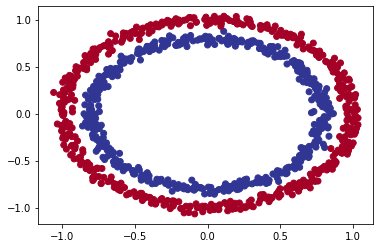

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(circles['X0'], 
            circles['X1'], 
            c=circles['label'],
            cmap=plt.cm.RdYlBu);

## Input and output shape

In [9]:
# Check the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
X[0].shape, y[0].shape

((2,), ())

In [12]:
X[0].ndim, y[0].ndim

(1, 0)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
X_train.shape, y_train.shape, X_test.shape, X_test.shape

((800, 2), (800,), (200, 2), (200, 2))

In [15]:
# Import TensorFlow
import tensorflow as tf

----
----
## Creating `model_1` with `linear` activation
----
----

In [16]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.models.Sequential()

# Add Input Layer
model_1.add(tf.keras.layers.InputLayer(input_shape=(2,)))

# Add the last hidden layer
model_1.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.linear))

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.binary_accuracy])

# Print model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit the model
history = model_1.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_test, y_test), verbose=0)

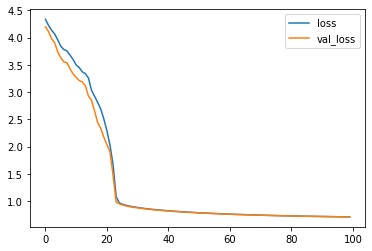

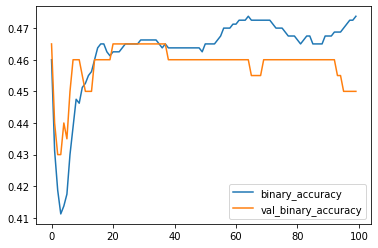

In [18]:
pd.DataFrame(history.history).loc[:, ['loss', 'val_loss']].plot()
pd.DataFrame(history.history).loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [19]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7087 - binary_accuracy: 0.4500


[0.7087266445159912, 0.44999998807907104]

### Create a function `plot_decision_boundary` to visualize model's predictions
* Take in a trained model, features `X` and lables `y`
* Create a meshgrid of different `X` values
* Plot the predictions as well as a line between zones (Where each unique class lies)


In [20]:
import numpy as np

In [21]:
# Create `plot_decision_boundary`

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...
doing binary classifcation...


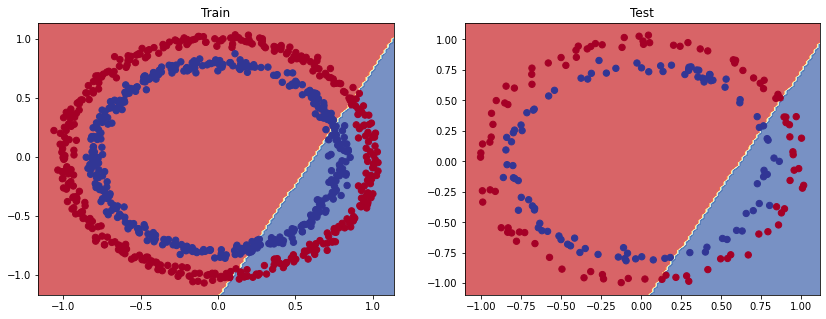

In [22]:
# Check the decision bounday for the latest model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

plt.show();


----
----
## Creating `model_2` with `sigmoid` activation
----
----

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create model_2
model_2 = tf.keras.models.Sequential()

# Add input layer
model_2.add(tf.keras.layers.InputLayer(input_shape=(2,)))

# Add the last layer
model_2.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid))

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.binary_accuracy])

# Fit the model
history = model_1.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_test, y_test), verbose=0)

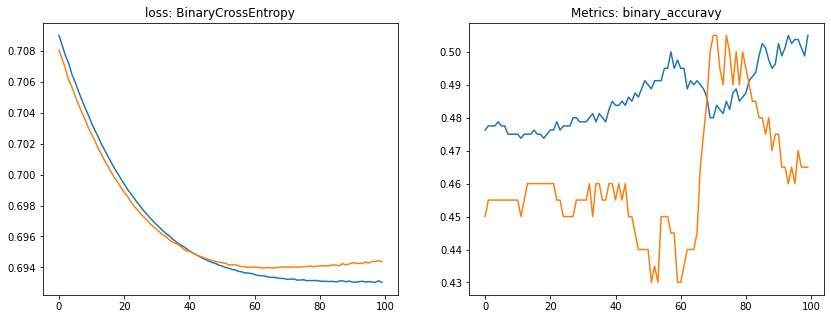

In [24]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('loss: BinaryCrossEntropy')
plt.plot(pd.DataFrame(history.history).loc[:, ['loss', 'val_loss']])

plt.subplot(1, 2, 2)
plt.title('Metrics: binary_accuravy')
plt.plot(pd.DataFrame(history.history).loc[:, ['binary_accuracy', 'val_binary_accuracy']])

plt.show();

doing binary classifcation...
doing binary classifcation...


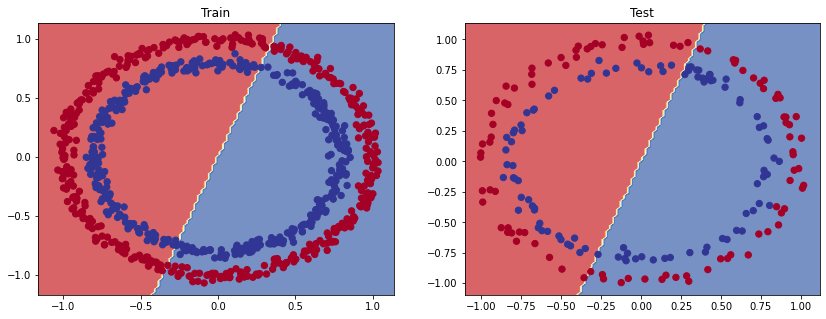

In [25]:
# Check the decision bounday for the latest model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_2, X_test, y_test)

plt.show();

----
----
## Creating `model_3` with `relu` activation
----
----

In [26]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.models.Sequential()

# Add the input layer
model_3.add(tf.keras.layers.InputLayer(input_shape=(2,)))

# Add the last layer
model_3.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu))

# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.binary_accuracy]
                )

# Fit model_3
history = model_3.fit(X_train, y_train, epochs=100, 
            validation_data=(X_test, y_test), verbose=0)

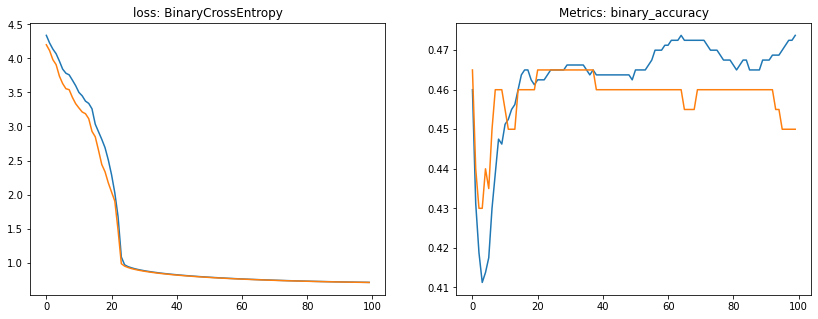

In [27]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('loss: BinaryCrossEntropy')
plt.plot(pd.DataFrame(history.history).loc[:, ['loss', 'val_loss']])

plt.subplot(1, 2, 2)
plt.title('Metrics: binary_accuracy')
plt.plot(pd.DataFrame(history.history).loc[:, ['binary_accuracy', 'val_binary_accuracy']])

plt.show();

doing binary classifcation...
doing binary classifcation...


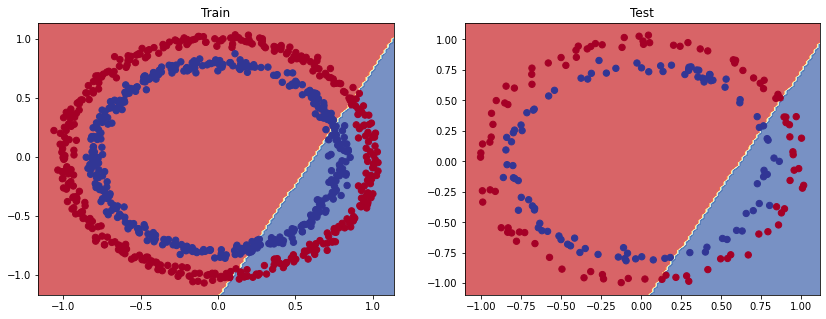

In [28]:
# Check the decision bounday for the latest model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

plt.show();


----
----
## Creating `model_4` with more layers and neurons per layer
----
----

In [29]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.models.Sequential()

# Add input layer
model_4.add(tf.keras.layers.InputLayer(input_shape=(2,)))

# Add hidden layers
model_4.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model_4.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))

# Add the last layer
model_4.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid))

# Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.binary_accuracy])

# Print the model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Fit the model
history = model_4.fit(X_train, y_train, epochs=25, 
            validation_data=(X_test, y_test), verbose=0)

In [31]:
model_4.evaluate(X_test, y_test), model_4.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.1231 - binary_accuracy: 0.9762


([0.18863724172115326, 0.9449999928474426],
 [0.12311301380395889, 0.9762499928474426])

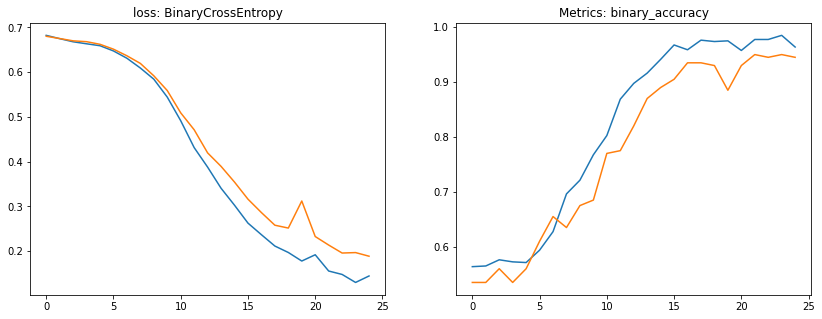

In [32]:
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
plt.title('loss: BinaryCrossEntropy')
plt.plot(pd.DataFrame(history.history).loc[:, ['loss', 'val_loss']])

plt.subplot(1, 2, 2)
plt.title('Metrics: binary_accuracy')
plt.plot(pd.DataFrame(history.history).loc[:, ['binary_accuracy', 'val_binary_accuracy']])

plt.show();

doing binary classifcation...
doing binary classifcation...


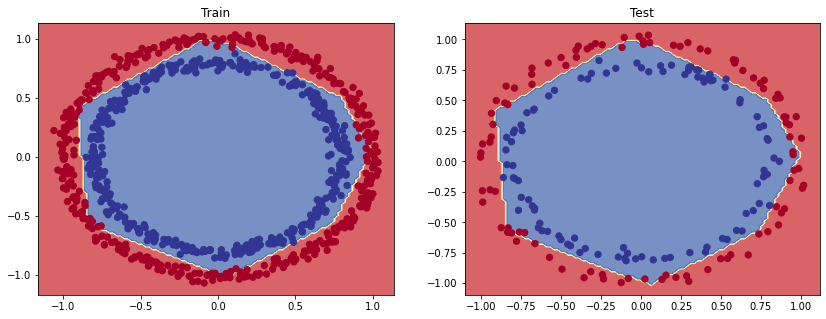

In [33]:
# Check the decision bounday for the latest model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_4, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_4, X_test, y_test)

plt.show();

----
----
## Creating `model_5` and finding the ideal learning
----
----
The learning rate where the loss decreases the most during training

In [90]:
# Create the model
model_5 = tf.keras.models.Sequential()

# Add input layer
model_5.add(tf.keras.layers.InputLayer(input_shape=(2,)))

# Add hidden layers
model_5.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model_5.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))

# Add the last layer
model_5.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid))

# compile the model
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.binary_accuracy])

# Print the model summary
model_5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Creat a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_5 = model_5.fit(X_train, y_train,
          epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[lr_scheduler],
          verbose=0)

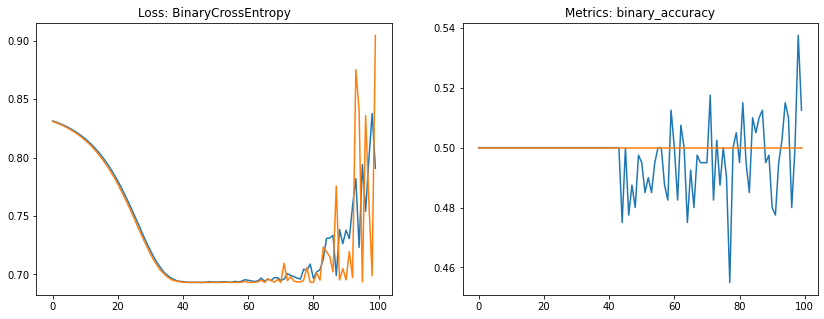

In [134]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(pd.DataFrame(history_5.history).loc[:, ['loss', 'val_loss']])
plt.title('Loss: BinaryCrossEntropy')

plt.subplot(1, 2, 2)
plt.plot(pd.DataFrame(history_5.history).loc[:, ['binary_accuracy', 'val_binary_accuracy']]);
plt.title('Metrics: binary_accuracy')

plt.show();

In [102]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))

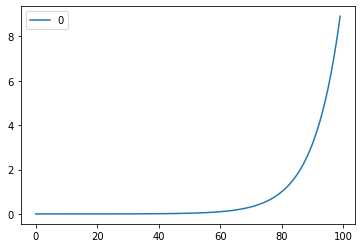

In [108]:
pd.DataFrame(lrs).plot();

Text(0.5, 1.0, 'Learning rate vs Loss')

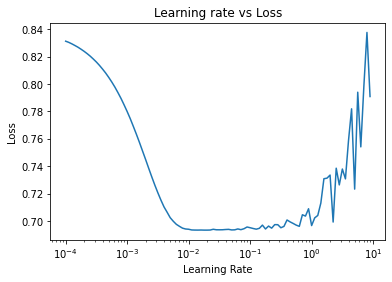

In [114]:
plt.semilogx(lrs, history_5.history['loss']);
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

In [130]:
# Recreate the model wih a higher learning rate\

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.models.Sequential()

# Add input layer
model_6.add(tf.keras.layers.InputLayer(input_shape=(2,)))

# Add hidden layers
model_6.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model_6.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))

# Add the last layer
model_6.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid))

# Compile the model
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.008),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.binary_accuracy])

# Print the model summary
model_6.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_55 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Fit the model
history_6 = model_6.fit(X_train, y_train, epochs=25,
            validation_data=(X_test, y_test),
            verbose=0)

model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1627 - binary_accuracy: 0.9750


[0.16265472769737244, 0.9750000238418579]

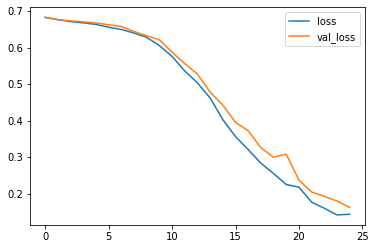

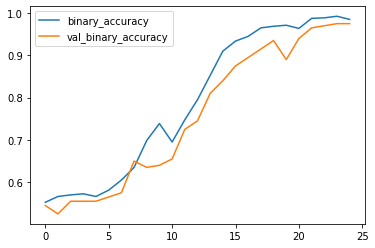

In [132]:
pd.DataFrame(history_6.history).loc[:, ['loss', 'val_loss']].plot()
pd.DataFrame(history_6.history).loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

doing binary classifcation...
doing binary classifcation...


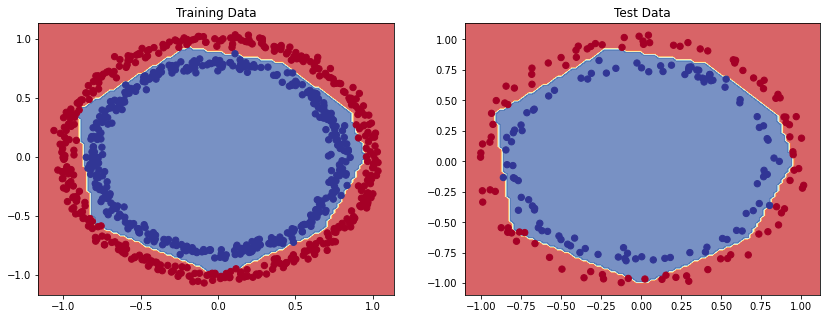

In [137]:
# Plot the decision boundaries for he training and test sets
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Training Data')
plot_decision_boundary(model_6, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test Data')
plot_decision_boundary(model_6, X_test, y_test)


## More classification evaluation methods

In [139]:
loss, binary_accuracy = model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1627 - binary_accuracy: 0.9750


In [141]:
loss, binary_accuracy

(0.16265472769737244, 0.9750000238418579)

In [144]:
# Create a confusion_matrix

# import confusion_matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_6.predict(X_test)

y_preds[:10]

array([[0.9207051 ],
       [0.14512742],
       [0.9360984 ],
       [0.11179498],
       [0.6648322 ],
       [0.8008065 ],
       [0.01022673],
       [0.02831513],
       [0.8548135 ],
       [0.0923366 ]], dtype=float32)

In [147]:
# Convert prediction probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [148]:
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  3],
       [ 2, 98]])

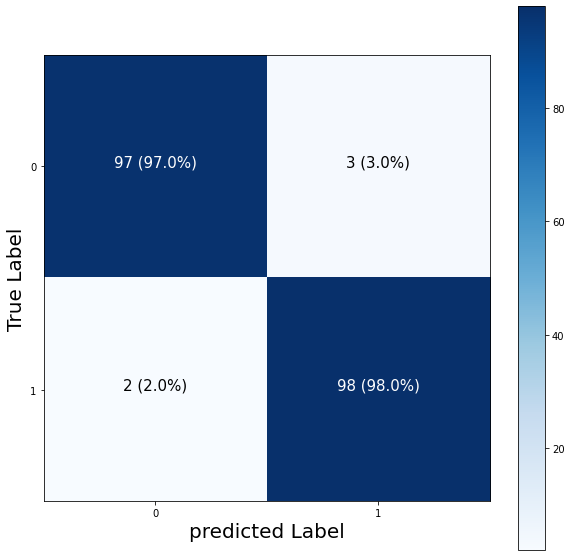

In [195]:
# Create a plot_confusion_matrix for tensorflow model
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10, 10)

# Create a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_normal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

n_classes = cm.shape[0]
n_classes

# Plot the matrix
fig, ax = plt.subplots(figsize=figsize)

# Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(label="Confusion Matrix",
       xlabel="predicted Label",
       xticks=np.arange(n_classes),
       xticklabels=labels,
       ylabel="True Label",
       yticks=np.arange(n_classes),
       yticklabels=labels)

# Set x-axis label to the buttom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threashold for different colors
threashold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i, j]>threashold else 'black',
           size=15)